# Project: Bay Area Real Estate Market Analysis

### Context: 
    
The real estate market is something that every person living in the country
has to deal with.The housing price  in San Francisco Bay Area accelerating at
shocking rates. From 2010 to 2017, the median price of a single family home
in San Francisco has gone from approximately &775,000 to $1.5 million. 

Data Source: REDFIN Real Estate Brokerage

Online Link: https://www.redfin.com/

Areas of Focus: Bay Area Counties

### Objective
In this project, we tried to analyse the house prices in bay area based on different parameters and fond out the important factors that afftects the prices of houses.

Web Scrapping of properties listed on Redfin.
Data Cleaning.
Exploratory Data Analysis:
- Distribution of prices of houses in Bay Area
- Top/Bottom cities based on Avg. price per sqft
- Distribution of property types across counties
- How different variables are impacting the Housing market
- Model building to predict of Redfin estimates for Bay Area Houses
- Observations & analysis 



### Data Dictionary:

- State: State of the property

- County: Area in which the property is located in

- City: City of the property

- Street: Location of the property

- Zipcode: Zip Code of the property

- Property_Type: Type of Property

- Status: Availability of property for sale

- Price: Listed price/selling price/market value for the property

- Year_Built: Year of Built

- Beds: Number of rooms in the property

- Bath: Number of baths in the property

- Sqft: Overall area in square feet

- Lot Area: Overall Lot area in square feet

- HOA: Due Homeowner’s association fee per month

- School_rating: School score measures the education standard of nearby schools

- WalkScore: Walk Score measures the walkability of any address

- Bike_Score: Bike Score measures whether an area is good for biking

- Garage_availability: Available of garage in the property

- Redfin_estimate: Property price estimate provided by Redfin


In [1]:

## for data
import pandas as pd
import numpy as np
## for plotting
import matplotlib.pyplot as plt
import seaborn as sns
## for statistical tests
import scipy
import statsmodels.formula.api as smf
import statsmodels.api as sm
## for machine learning
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition
## for explainer
from lime import lime_tabular

In [2]:
df = pd.read_csv(r"Dataset_AfterDataCleaningFinal.csv")

In [3]:
df.columns

Index(['State', 'County', 'City', 'Street', 'Zipcode', 'Property_Type',
       'Status', 'Price', 'Year_Built', 'Beds', 'Bath', 'Sqft', 'Lot Area',
       'HOA Due', 'School_rating', 'WalkScore', 'Bike_Score',
       'Garage_availability', 'Redfin_estimate'],
      dtype='object')

In [4]:
df = df[['State', 'County', 'City', 'Street', 'Zipcode',
       'Property_Type', 'Status', 'Price', 'Year_Built', 'Beds', 'Bath',
       'Sqft', 'Lot Area', 'School_rating', 'WalkScore', 'Bike_Score',
       'Garage_availability', 'Redfin_estimate']]

### Data Overview
- Observation
- Sanity check
- Missing value treatment

In [5]:
df.head()

,State,County,City,Street,Zipcode,Property_Type,Status,Price,Year_Built,Beds,Bath,Sqft,Lot Area,School_rating,WalkScore,Bike_Score,Garage_availability,Redfin_estimate
0,Ca,Contra-costa-county,Oakley,2537 talaria dr,94561,Single family residential,Back on market,649999.0,2014,3.0,2.5,2279.0,6228.0,6,6,35.0,Yes,655836.0
1,Ca,Contra-costa-county,Pleasant hill,66 kathryn dr,94523,Single family residential,Price change,998000.0,1952,3.0,1.0,1315.0,6650.0,8,83,76.0,Yes,1048496.0
2,Ca,Contra-costa-county,San ramon,3246 ensenada dr,94583,Single family residential,New,1395000.0,1976,4.0,2.5,1880.0,7000.0,9,26,67.0,Yes,1413765.0
3,Ca,Contra-costa-county,Rodeo,30 london ln,94572,Single family residential,New,1249000.0,2022,4.0,3.5,2996.0,4850.0,0,4,8.0,Yes,0.0
4,Ca,Contra-costa-county,Pittsburg,153 shannon,94565,Mobile/manufactured home,Active,159900.0,2022,2.0,1.0,720.0,8760.0,5,7,30.0,Yes,160645.0


In [6]:
df.describe()

,Price,Year_Built,Beds,Bath,Sqft,Lot Area,School_rating,WalkScore,Bike_Score,Redfin_estimate
count,8.860000e+02,886.000000,886.000000,886.000000,886.000000,886.000000,886.00000,886.000000,886.000000,8.860000e+02
mean,1.165544e+06,1968.168172,3.253950,2.222912,1767.404063,6305.869300,6.64447,48.063205,48.367946,1.088380e+06
std,6.405347e+05,28.621866,1.031625,0.802697,713.920575,3122.853963,2.01604,26.909861,24.172405,7.041116e+05
min,9.000000e+04,1895.000000,0.000000,1.000000,375.000000,1.000000,0.00000,0.000000,0.000000,0.000000e+00
25%,6.990000e+05,1951.000000,3.000000,2.000000,1225.000000,4400.000000,5.00000,25.000000,31.000000,6.379135e+05
50%,9.770000e+05,1969.000000,3.000000,2.000000,1671.000000,5992.000000,7.00000,48.000000,50.500000,9.309975e+05
75%,1.462938e+06,1989.000000,4.000000,2.500000,2196.750000,7745.250000,8.00000,70.000000,66.000000,1.437496e+06
max,3.198000e+06,2022.000000,7.000000,4.500000,4090.000000,17424.000000,9.00000,100.000000,100.000000,3.221481e+06


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886 entries, 0 to 885
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   State                886 non-null    object 
 1   County               886 non-null    object 
 2   City                 886 non-null    object 
 3   Street               886 non-null    object 
 4   Zipcode              886 non-null    object 
 5   Property_Type        886 non-null    object 
 6   Status               886 non-null    object 
 7   Price                886 non-null    float64
 8   Year_Built           886 non-null    int64  
 9   Beds                 886 non-null    float64
 10  Bath                 886 non-null    float64
 11  Sqft                 886 non-null    float64
 12  Lot Area             886 non-null    float64
 13  School_rating        886 non-null    int64  
 14  WalkScore            886 non-null    int64  
 15  Bike_Score           886 non-null    flo

There are no missing values in the data as we treated it while web scrapping

### Exploratory Data Analysis

#### Questions:
- What does the sales price distribution looks like?
- What is frequency of houses based on number of beds?
- What is the frequency of houses based on number of baths?
- Which cities are most expensive and which cities are least expensive based on the average price per square feet?
- What is the importance of school rating on the prices of house?
- What is the importance of walk score and bike score on prices of house?
- Is there correlation between the features?


In [8]:
df['School_rating']=df['School_rating'].replace(0,np.round(df['School_rating'].mean(),2))
df['School_rating'].describe()

count    886.000000
mean       6.696930
std        1.926774
min        2.000000
25%        5.000000
50%        7.000000
75%        8.000000
max        9.000000
Name: School_rating, dtype: float64

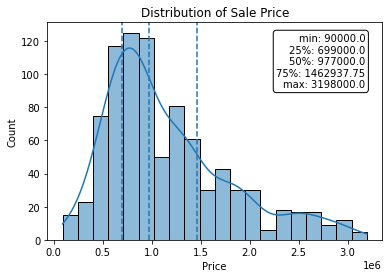

In [9]:
# Plotted the prices of all the cities to see how well the data is distributed. 
# We can conclude that price is positively skewed and mean > mode 
# which tells that there are outliers on the higher range of price of house listing

x = "Price"
fig, ax = plt.subplots()
ax.title.set_text('Distribution of Sale Price')
variable = df[x].fillna(df[x].mean())
sns.histplot(variable, kde=True)
des = df[x].describe()
ax.axvline(des["25%"], ls='--')
ax.axvline(des["50%"], ls='--')
ax.axvline(des["75%"], ls='--')
des = round(des, 2).apply(lambda x: str(x))
box = '\n'.join(("min: "+des["min"], "25%: "+des["25%"], "50%: "+des["50%"], "75%: "+des["75%"], "max: "+des["max"]))
ax.text(0.95, 0.95, box, transform=ax.transAxes, fontsize=10, va='top', 
        ha="right", bbox=dict(boxstyle='round', facecolor='white', alpha=1))
plt.show()

### Observations:
- Data mostly clustered around the left tail of distribution.
- Positively skewed distribution.
- The right tail of the distribution is longer.
- Mode < Media < Mean.
- Ideal distibution for a House Pricing Market

### Distribution of houses based on number of beds and baths

C:\Users\STSC\AppData\Local\Temp\ipykernel_13020\2356220060.py:30: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


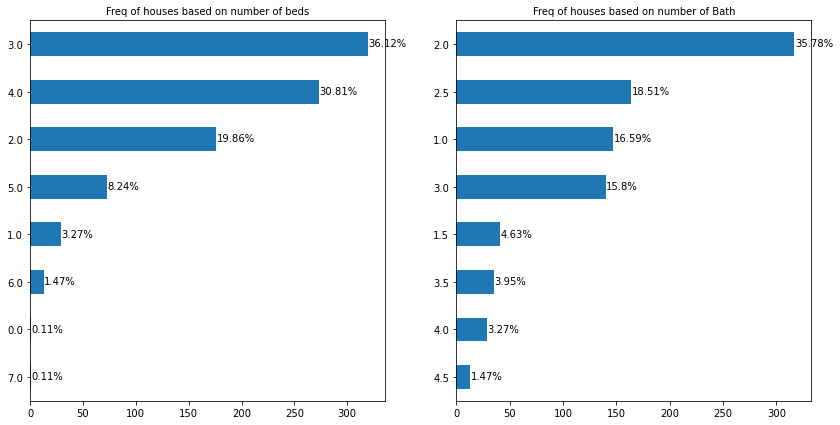

In [10]:
fig = plt.figure(figsize = (14,7))
f1 = fig.add_subplot(1,2,1)
x = "Beds"
ax = df[x].value_counts().sort_values().plot(kind="barh")
totals= []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
     ax.text(i.get_width()+.3, i.get_y()+.20, 
     str(round((i.get_width()/total)*100, 2))+'%', 
     fontsize=10, color='black')
#ax.grid(axis="x")
f1.set_title("Freq of houses based on number of beds", fontsize=10)


f2 = fig.add_subplot(1,2,2)
x = "Bath"
ax = df[x].value_counts().sort_values().plot(kind="barh")
totals= []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
     ax.text(i.get_width()+.3, i.get_y()+.20, 
     str(round((i.get_width()/total)*100, 2))+'%', 
     fontsize=10, color='black')
#ax.grid(axis="x")
f2.set_title("Freq of houses based on number of Bath", fontsize=10)
fig.show()

### Observation
- Houses with 3 bedrooms are the most frequent is the house listings in our data.
- Houses with 2 bathsare the most frequent is the house listings in our data.

### Analyzing the house prices based on County

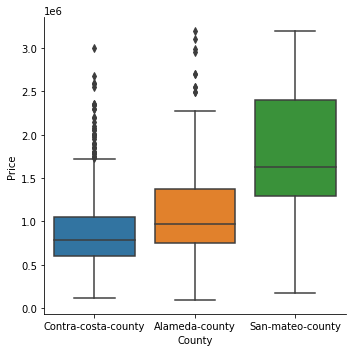

In [11]:
sns.catplot(x="County", y="Price", data=df, kind="box")

As it is not making much sense hence calculating average price per square feet and then plotted box plot

### Calculting avg price per sqft

In [12]:
#Creating a column for Price per sqft
df['Price_per_sqft'] = (df['Price']/df['Sqft']).round(2)
df.head(2)

,State,County,City,Street,Zipcode,Property_Type,Status,Price,Year_Built,Beds,Bath,Sqft,Lot Area,School_rating,WalkScore,Bike_Score,Garage_availability,Redfin_estimate,Price_per_sqft
0,Ca,Contra-costa-county,Oakley,2537 talaria dr,94561,Single family residential,Back on market,649999.0,2014,3.0,2.5,2279.0,6228.0,6.0,6,35.0,Yes,655836.0,285.21
1,Ca,Contra-costa-county,Pleasant hill,66 kathryn dr,94523,Single family residential,Price change,998000.0,1952,3.0,1.0,1315.0,6650.0,8.0,83,76.0,Yes,1048496.0,758.94


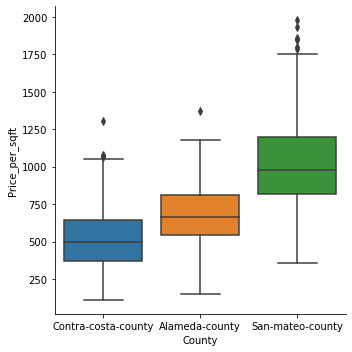

In [13]:
sns.catplot(x="County", y="Price_per_sqft", data=df, kind="box")

### Observation:

- At a county level, the avg price of a house is the highest in San Mateo ( with no outliers), followed by Alameda and then Contra-costa county.
- However, when considering price per sqft, there are outlier observations in San Mateo county.
- High prices in San Mateo not justified by larger living areas.

### Top and bottom cities based on average price per sq ft

In [14]:

a = df[df['Price_per_sqft'].notnull()].groupby(by="City")
b = a['Price_per_sqft'].mean().round(2)
b = pd.DataFrame(b)

In [15]:
# Top 7 and Bottom 7 cities in CA as per the Average price per square feet

Top7 = pd.DataFrame(b.sort_values(by = 'Price_per_sqft',ascending=False).head(7))
print(Top7)
Top7['Stack'] = 'Top7'

Bottom7 = pd.DataFrame(b.sort_values(by = 'Price_per_sqft',ascending=False).tail(7))
print(Bottom7)
Bottom7['Stack'] = 'Bottom7'

                Price_per_sqft
City                          
Portola valley         1796.63
Menlo park             1426.95
Brisbane               1302.90
Burlingame             1295.31
San carlos             1224.41
Millbrae               1096.50
Belmont                1095.36
               Price_per_sqft
City                         
Brentwood              375.82
Antioch                348.12
Crockett               346.34
Bay point              345.08
Pittsburg              340.98
Oakley                 324.11
Bethel island          128.94


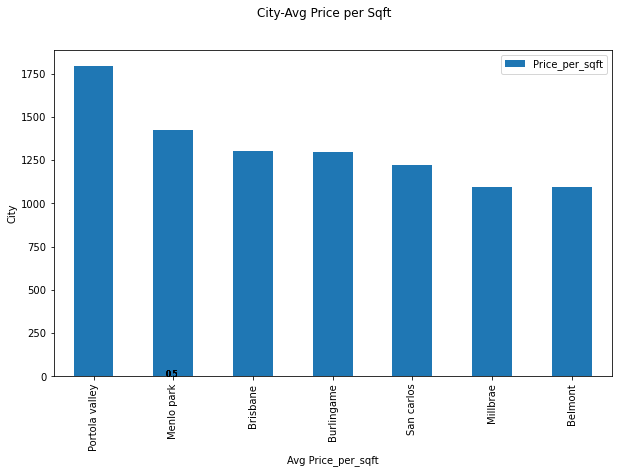

In [16]:
#Top 7 cities in CA as per the Average price per square feet

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 

 
# Horizontal Bar Plot
ax = Top7.plot(kind='bar',figsize=(10,6))
plt.xlabel("Avg Price_per_sqft")
plt.ylabel("City") 

# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.4, i.get_y()+0.1,
             str(round((i.get_width()), 2)),
             fontsize = 8, color ='black')
    
plt.suptitle('City-Avg Price per Sqft')
# Show Plot
plt.show()

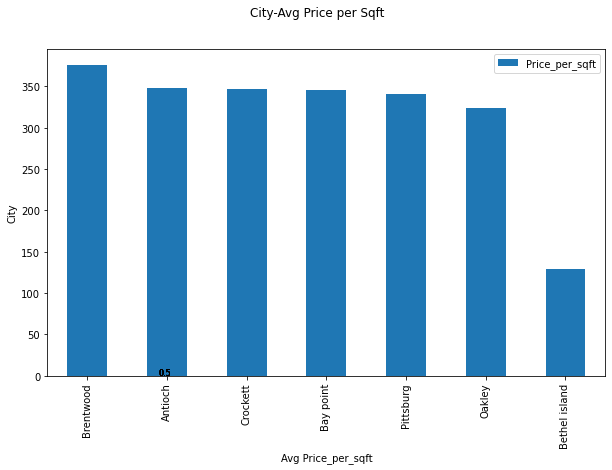

In [17]:
#Bottom 7 cities in CA as per the Average price per square feet

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 

 
# Horizontal Bar Plot
ax = Bottom7.plot(kind='bar',figsize=(10,6))
plt.xlabel("Avg Price_per_sqft")
plt.ylabel("City") 

# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.4, i.get_y()+0.1,
             str(round((i.get_width()), 2)),
             fontsize = 8, color ='black')
    
plt.suptitle('City-Avg Price per Sqft')
# Show Plot
plt.show()

### Effect of School Rating on house prices?

<AxesSubplot:xlabel='Price', ylabel='Count'>

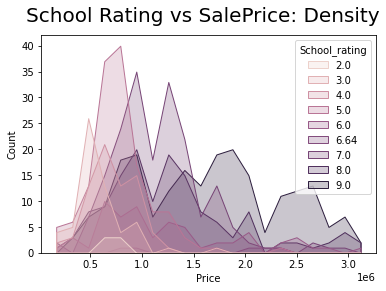

In [18]:
fig, ax = plt.subplots()
fig.suptitle("School Rating vs SalePrice: Density", fontsize=20)
sns.histplot(data = df, x = "Price", hue = "School_rating", element="poly")

Grouping school rating into 3 categories to make the chart more legible

In [19]:
bins= [0,3,6,10]
labels = ['bad','good','excellent']
df['school_rating_group'] = pd.cut(df['School_rating'], bins=bins, labels=labels, right=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886 entries, 0 to 885
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   State                886 non-null    object  
 1   County               886 non-null    object  
 2   City                 886 non-null    object  
 3   Street               886 non-null    object  
 4   Zipcode              886 non-null    object  
 5   Property_Type        886 non-null    object  
 6   Status               886 non-null    object  
 7   Price                886 non-null    float64 
 8   Year_Built           886 non-null    int64   
 9   Beds                 886 non-null    float64 
 10  Bath                 886 non-null    float64 
 11  Sqft                 886 non-null    float64 
 12  Lot Area             886 non-null    float64 
 13  School_rating        886 non-null    float64 
 14  WalkScore            886 non-null    int64   
 15  Bike_Score           88

<AxesSubplot:xlabel='Price_per_sqft', ylabel='Count'>

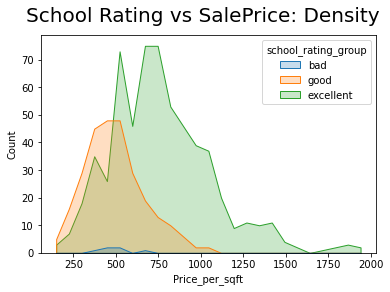

In [20]:
fig, ax = plt.subplots()
fig.suptitle("School Rating vs SalePrice: Density", fontsize=20)
sns.histplot(data = df, x = "Price_per_sqft", hue = "school_rating_group", element="poly")

C:\Users\STSC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\STSC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\STSC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot

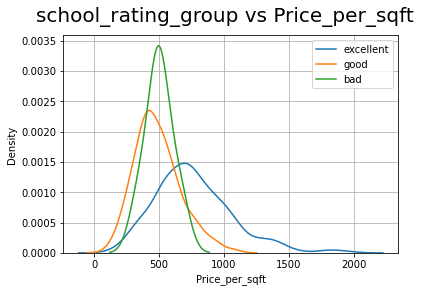

In [21]:
cat, num = "school_rating_group", "Price_per_sqft"
fig, ax = plt.subplots()
fig.suptitle("school_rating_group vs Price_per_sqft", fontsize=20)

for i in df[cat].unique():
    sns.distplot(df[df[cat]==i][num], hist=False, label= i, ax=ax)
plt.legend()
ax.grid(True)

### Observation:
- School ratings scale of 0-10 categorised as bad, good and excellent.
- Varying prices for varying school ratings.
- Important variable to determine house prices.

### Distribution of property type based on counties

In [22]:
Property_Type_Category =[]
for i in df['Property_Type']:
    if i in ['Single family','Single family home', 'Single family residence',
                'Single family residential','Single-wide mobile home']:
        Property_Type_Category.append('Single')
        
    elif i in ['Residential', 'Residential, townhouse', 'Townhouse']:
        Property_Type_Category.append('Residential')
        
    elif i in ['Cabin', 'Co-op', 'Condo', 'Condo/co-op']:
        Property_Type_Category.append('Condo')
        
    else :
        Property_Type_Category.append('Others')

In [23]:
df['Property_Type_Category'] =Property_Type_Category
df.head(2)

,State,County,City,Street,Zipcode,Property_Type,Status,Price,Year_Built,Beds,...,Sqft,Lot Area,School_rating,WalkScore,Bike_Score,Garage_availability,Redfin_estimate,Price_per_sqft,school_rating_group,Property_Type_Category
0,Ca,Contra-costa-county,Oakley,2537 talaria dr,94561,Single family residential,Back on market,649999.0,2014,3.0,...,2279.0,6228.0,6.0,6,35.0,Yes,655836.0,285.21,excellent,Single
1,Ca,Contra-costa-county,Pleasant hill,66 kathryn dr,94523,Single family residential,Price change,998000.0,1952,3.0,...,1315.0,6650.0,8.0,83,76.0,Yes,1048496.0,758.94,excellent,Single


In [24]:
g = pd.crosstab(df['County'],df['Property_Type_Category'])
g

Property_Type_Category,Condo,Others,Residential,Single
County,,,,
Alameda-county,27,11,16,221
Contra-costa-county,40,12,23,338
San-mateo-county,18,8,13,159


(array([0, 1, 2]),
 [Text(0, 0, 'Alameda-county'),
  Text(1, 0, 'Contra-costa-county'),
  Text(2, 0, 'San-mateo-county')])

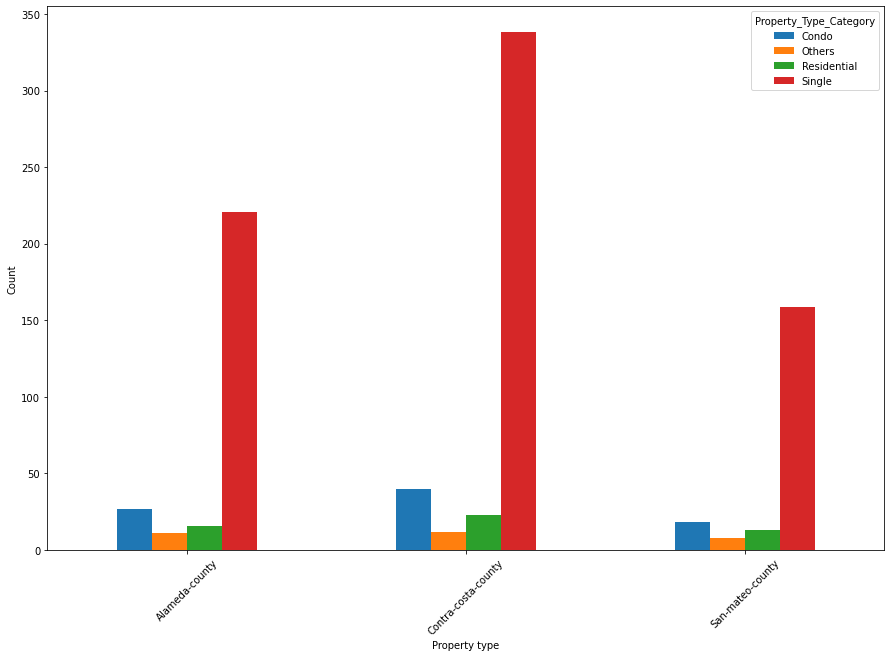

In [25]:
County_8 = ['Alameda-county', 'Contra-costa-county', 'San-mateo-county']
unique_ts = ['Condo','Others','Residential','Single']
g.loc[County_8, unique_ts].plot.bar(figsize=(15,10))
plt.xlabel('Property type')
plt.ylabel('Count')
plt.xticks(rotation=45)

### Observation:

- The chart depicts the distribution of property type categories across the 3 counties.
- Majority of the houses in all the 3 counties are Single Family homes.

### Distribution of property status  across Counties

In [26]:
Status_Category =[]
for i in df['Status']:
    if i in ['Active','Price change']:
     
        Status_Category.append('Active')
        
    elif i in ['Coming soon', 'New']:
        Status_Category.append('Coming soon')
        
    else:
        Status_Category.append('Pending')
        

In [27]:
df['Status_Category'] = Status_Category


In [28]:
status_desc = pd.crosstab(df['County'],df['Status_Category'])
status_desc

Status_Category,Active,Coming soon,Pending
County,,,
Alameda-county,80,194,1
Contra-costa-county,231,177,5
San-mateo-county,192,6,0


(array([0, 1, 2]),
 [Text(0, 0, 'Alameda-county'),
  Text(1, 0, 'Contra-costa-county'),
  Text(2, 0, 'San-mateo-county')])

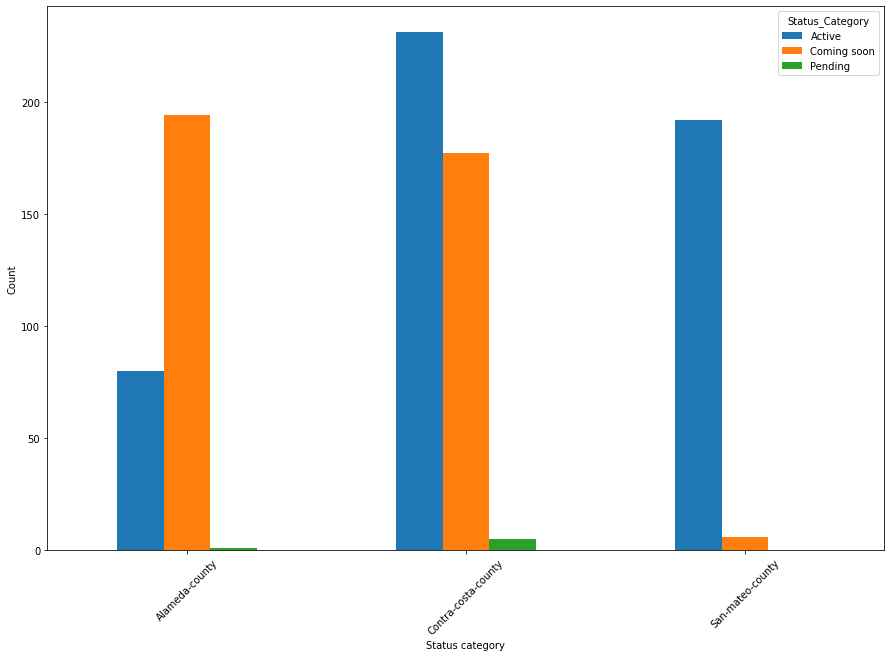

In [29]:
County_5 = ['Alameda-county', 'Contra-costa-county', 'San-mateo-county']
unique_t = ['Active','Coming soon','Pending']
status_desc.loc[County_5, unique_t].plot.bar(figsize=(15,10))
plt.xlabel('Status category')
plt.ylabel('Count')
plt.xticks(rotation=45)

### Observation
- The chart depicts the distribution of property status of homes across the 3 counties.
- Majority of the houses in all the 3 counties are are either Coming Soon or are curently Active for sale.

### Missing Value Treatment

In [30]:
columns = ['Bath','Sqft','Lot Area']
for i in columns:
    df[i] = df[i].fillna(df[i].mean())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886 entries, 0 to 885
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   State                   886 non-null    object  
 1   County                  886 non-null    object  
 2   City                    886 non-null    object  
 3   Street                  886 non-null    object  
 4   Zipcode                 886 non-null    object  
 5   Property_Type           886 non-null    object  
 6   Status                  886 non-null    object  
 7   Price                   886 non-null    float64 
 8   Year_Built              886 non-null    int64   
 9   Beds                    886 non-null    float64 
 10  Bath                    886 non-null    float64 
 11  Sqft                    886 non-null    float64 
 12  Lot Area                886 non-null    float64 
 13  School_rating           886 non-null    float64 
 14  WalkScore               88

In [31]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886 entries, 0 to 885
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   State                   886 non-null    object  
 1   County                  886 non-null    object  
 2   City                    886 non-null    object  
 3   Street                  886 non-null    object  
 4   Zipcode                 886 non-null    object  
 5   Property_Type           886 non-null    object  
 6   Status                  886 non-null    object  
 7   Price                   886 non-null    float64 
 8   Year_Built              886 non-null    int64   
 9   Beds                    886 non-null    float64 
 10  Bath                    886 non-null    float64 
 11  Sqft                    886 non-null    float64 
 12  Lot Area                886 non-null    float64 
 13  School_rating           886 non-null    float64 
 14  WalkScore               88

### Distribution of walkscore 

In [32]:
#Categorizing walscore scores into ordinal categories
walkscore_desc_list = []
for t in df['WalkScore']:
    if t <= 100 and t >= 90:
        walkscore_desc_list.append('Excellent')
    elif t <= 89 and t >= 70:
        walkscore_desc_list.append('Better')
    elif t <= 69 and t >= 50:
        walkscore_desc_list.append('Good')
    elif t <= 49 and t >= 25:
        walkscore_desc_list.append('Fair')
    elif t <= 24 and t >= 0:
        walkscore_desc_list.append('Bad')
    else:
        walkscore_desc_list.append('')
df['walkscore_desc'] = walkscore_desc_list

<AxesSubplot:xlabel='County'>

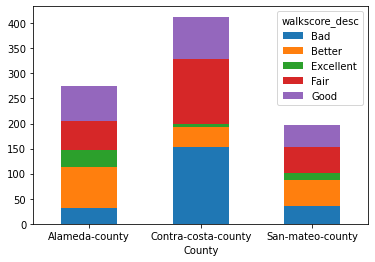

In [33]:
#stacked bar plot to show walk score categories
pd.crosstab(df['County'],df['walkscore_desc']).plot(kind="bar", stacked=True, rot=0)

### Observation
- Contra-costa county has the highest frequency of houses with bad walk and bike score.
- Distribution of houses across varying score categories in all the 3 counties is quite spreaded out.

### Relation between walkscore and house prices

Text(0.5, 1.0, 'Correlation between Price and WalkScores')

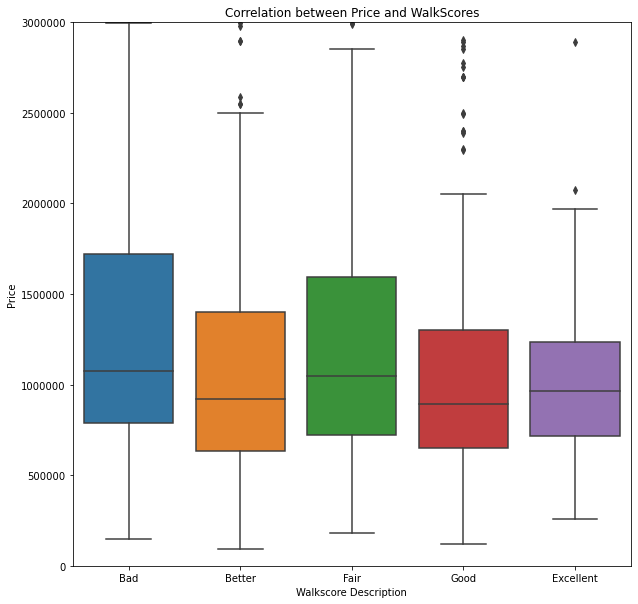

In [34]:
# Price range based on the walkscore (averaged for each county)
plt.figure(figsize=(10,10))
sns.boxplot(x="walkscore_desc", y="Price", data=df)
plt.ticklabel_format(style='plain', axis='y')
plt.ylim(0, 3000000)
plt.ylabel("Price")
plt.xlabel("Walkscore Description")
plt.title("Correlation between Price and WalkScores")

In [35]:
#Categorizing scores into ordinal categories
bikecore_desc_list = []
for t in df['Bike_Score']:
    if t <= 100 and t >= 90:
        bikecore_desc_list.append('Excellent')
    elif t <= 89 and t >= 70:
        bikecore_desc_list.append('Better')
    elif t <= 69 and t >= 50:
        bikecore_desc_list.append('Good')
    elif t <= 49 and t >= 25:
        bikecore_desc_list.append('Fair')
    elif t <= 24 and t >= 0:
        bikecore_desc_list.append('Bad')
    else:
        bikecore_desc_list.append('')
df['BikeScore_desc'] = bikecore_desc_list

<AxesSubplot:xlabel='County'>

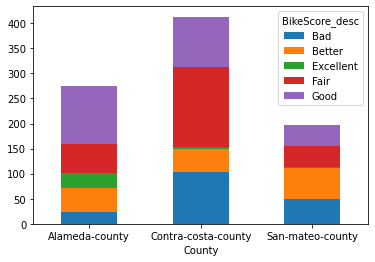

In [36]:
#stacked bar plot to show bike score categories
pd.crosstab(df['County'],df['BikeScore_desc']).plot(kind="bar", stacked=True, rot=0)

Text(0.5, 1.0, 'Correlation between Price and BikeScores')

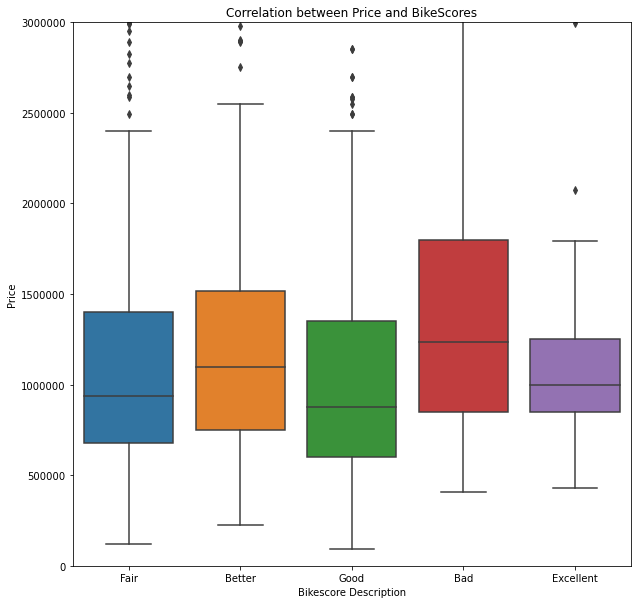

In [37]:
# Price range based on the bike (averaged for each county)
plt.figure(figsize=(10,10))
sns.boxplot(x="BikeScore_desc", y="Price", data=df)
plt.ticklabel_format(style='plain', axis='y')
plt.ylim(0, 3000000)
plt.ylabel("Price")
plt.xlabel("Bikescore Description")
plt.title("Correlation between Price and BikeScores")

# Regresssion

#### Objective: Predicting the house prices using regression and comparing it with the Redfin's estimated prices

In [38]:
reg_data = df[['Year_Built', 'Beds', 'Bath', 'Sqft', 'Lot Area',
       'School_rating', 'WalkScore', 'Bike_Score', 'Garage_availability',
       'Redfin_estimate','Property_Type_Category', 'Status_Category']] # Filter out the unwanted variables from the dataframe

In [39]:
reg_data = pd.get_dummies(reg_data, drop_first = True) # Create dummy variables

#### Splitting the data into training and testing

In [40]:
## split data
df_train, df_test = model_selection.train_test_split(reg_data, 
                      test_size=0.3)
## print info
print("X_train shape:", df_train.drop("Redfin_estimate",axis=1).shape, "| X_test shape:", df_test.drop("Redfin_estimate",axis=1).shape)
print("y_train mean:", round(np.mean(df_train["Redfin_estimate"]),2), "| y_test mean:", round(np.mean(df_test["Redfin_estimate"]),2))
print(df_train.shape[1], "features:", df_train.drop("Redfin_estimate",axis=1).columns.to_list())

X_train shape: (620, 14) | X_test shape: (266, 14)
y_train mean: 1108997.74 | y_test mean: 1040322.24
15 features: ['Year_Built', 'Beds', 'Bath', 'Sqft', 'Lot Area', 'School_rating', 'WalkScore', 'Bike_Score', 'Garage_availability_Yes', 'Property_Type_Category_Others', 'Property_Type_Category_Residential', 'Property_Type_Category_Single', 'Status_Category_Coming soon', 'Status_Category_Pending']


In [41]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 620 entries, 666 to 675
Data columns (total 15 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Year_Built                          620 non-null    int64  
 1   Beds                                620 non-null    float64
 2   Bath                                620 non-null    float64
 3   Sqft                                620 non-null    float64
 4   Lot Area                            620 non-null    float64
 5   School_rating                       620 non-null    float64
 6   WalkScore                           620 non-null    int64  
 7   Bike_Score                          620 non-null    float64
 8   Redfin_estimate                     620 non-null    float64
 9   Garage_availability_Yes             620 non-null    uint8  
 10  Property_Type_Category_Others       620 non-null    uint8  
 11  Property_Type_Category_Residential  620 non

- All the variables are converted into numeric format, hence we can proceed further

#### Scaling the data to make it suitable for regresssion

In [42]:
## scale X
scalerX = preprocessing.RobustScaler(quantile_range=(25.0, 75.0))
X = scalerX.fit_transform(df_train.drop("Redfin_estimate", axis=1))
df_train_scaled= pd.DataFrame(X, columns=df_train.drop("Redfin_estimate", 
                        axis=1).columns, index=df_train.index)
## scale Y
scalerY = preprocessing.RobustScaler(quantile_range=(25.0, 75.0))
df_train_scaled['Redfin_estimate'] = scalerY.fit_transform(df_train['Redfin_estimate'].values.reshape(-1,1))
df_train_scaled.head()

,Year_Built,Beds,Bath,Sqft,Lot Area,School_rating,WalkScore,Bike_Score,Garage_availability_Yes,Property_Type_Category_Others,Property_Type_Category_Residential,Property_Type_Category_Single,Status_Category_Coming soon,Status_Category_Pending,Redfin_estimate
666,0.078947,0.0,0.0,0.047537,0.616714,0.333333,0.231214,0.394366,0.0,0.0,0.0,0.0,1.0,0.0,0.455681
189,1.421053,1.0,2.0,0.414954,0.091919,-0.333333,-0.161850,0.084507,0.0,0.0,0.0,0.0,0.0,0.0,-0.286361
53,0.105263,1.0,-1.0,-0.334736,-1.421186,-1.333333,0.231214,0.422535,0.0,0.0,1.0,-1.0,1.0,0.0,-0.582692
560,1.000000,-2.0,0.0,0.188165,0.271691,-0.666667,0.878613,1.070423,0.0,0.0,1.0,-1.0,1.0,0.0,-1.175710
395,0.605263,1.0,4.0,2.384749,0.285631,0.000000,-0.994220,-0.422535,0.0,0.0,0.0,0.0,0.0,0.0,-0.130420


In [43]:
## scale X
scalerX = preprocessing.RobustScaler(quantile_range=(25.0, 75.0))
X = scalerX.fit_transform(df_test.drop("Redfin_estimate", axis=1))
df_test_scaled= pd.DataFrame(X, columns=df_test.drop("Redfin_estimate", 
                        axis=1).columns, index=df_test.index)
## scale Y
scalerY = preprocessing.RobustScaler(quantile_range=(25.0, 75.0))
df_test_scaled['Redfin_estimate'] = scalerY.fit_transform(df_test['Redfin_estimate'].values.reshape(-1,1))
df_test_scaled.head()

,Year_Built,Beds,Bath,Sqft,Lot Area,School_rating,WalkScore,Bike_Score,Garage_availability_Yes,Property_Type_Category_Others,Property_Type_Category_Residential,Property_Type_Category_Single,Status_Category_Coming soon,Status_Category_Pending,Redfin_estimate
431,-0.741722,-1.0,-2.0,-0.713890,-0.619195,-1.000000,0.758974,0.260274,0.0,0.0,0.0,0.0,1.0,0.0,-0.229495
105,-0.423841,2.0,2.0,0.295517,-0.609288,0.666667,-0.717949,-0.205479,-1.0,0.0,0.0,0.0,0.0,0.0,0.095298
246,-0.529801,0.0,-2.0,-0.696182,0.804644,-0.666667,-0.020513,0.753425,0.0,0.0,0.0,0.0,0.0,0.0,-0.307288
516,-1.350993,0.0,1.0,0.080797,-0.990712,0.000000,0.820513,0.506849,0.0,0.0,0.0,0.0,1.0,0.0,0.309574
760,0.291391,-2.0,-2.0,-0.917543,-0.269350,0.000000,0.533333,-0.589041,-1.0,0.0,0.0,0.0,0.0,0.0,-0.133842


#### Correlation matrix

<AxesSubplot:>

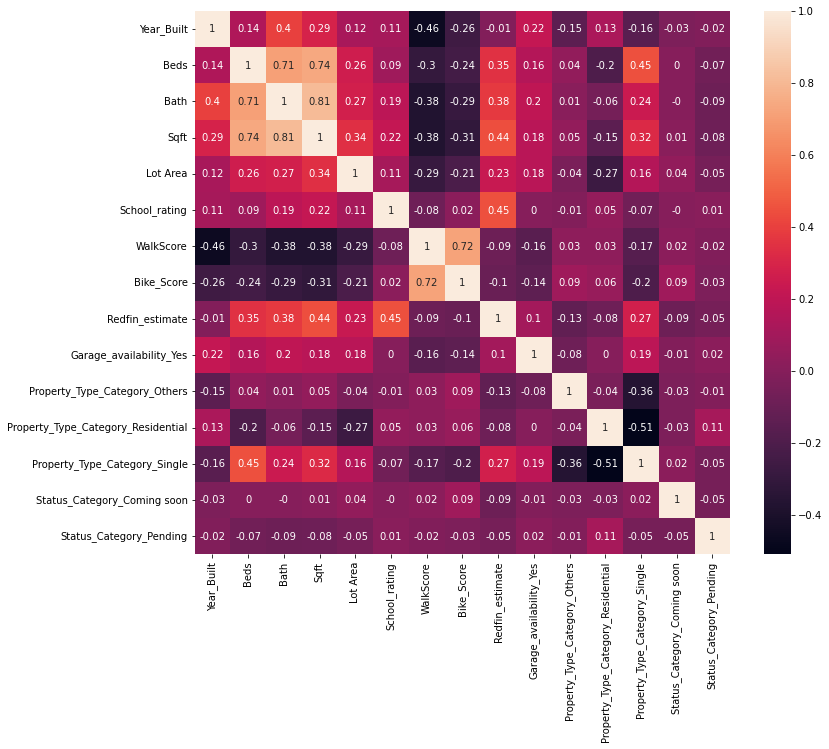

In [44]:
correlation_matrix = df_train.corr().round(2)
fig,ax = plt.subplots(figsize=(12,10))
sns.heatmap(data=correlation_matrix, annot=True,ax=ax)

### Observation:
- Correlation exists between Bed, Bath and SqFt.

- Supports the trend of higher number of bedrooms and bathrooms in a higher SqFt area home.

- No other variable shows any correlation.

In [45]:
X_names = ['Year_Built', 'Beds', 'Bath', 'Sqft', 'Lot Area', 'School_rating', 'WalkScore', 'Bike_Score', 'Garage_availability_Yes','Property_Type_Category_Others', 'Property_Type_Category_Residential','Property_Type_Category_Single', 'Status_Category_Coming soon','Status_Category_Pending']
X_train = df_train_scaled[X_names].values
y_train = df_train_scaled["Redfin_estimate"].values
X_test = df_test_scaled[X_names].values
y_test = df_test_scaled["Redfin_estimate"].values

#### Regression model with K fold cross validation

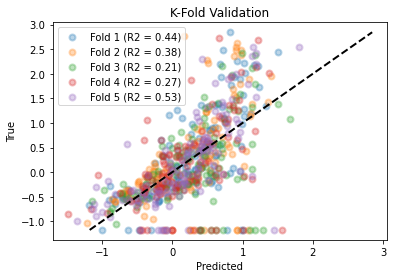

In [46]:
## call model
model = linear_model.LinearRegression()
## K fold validation
scores = []
cv = model_selection.KFold(n_splits=5, shuffle=True)
fig = plt.figure()
i = 1
for train, test in cv.split(X_train, y_train):
    prediction = model.fit(X_train[train],
                 y_train[train]).predict(X_train[test])
    true = y_train[test]
    score = metrics.r2_score(true, prediction)
    scores.append(score)
    plt.scatter(prediction, true, lw=2, alpha=0.3, 
                label='Fold %d (R2 = %0.2f)' % (i,score))
    i = i+1
plt.plot([min(y_train),max(y_train)], [min(y_train),max(y_train)], 
         linestyle='--', lw=2, color='black')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('K-Fold Validation')
plt.legend()
plt.show()

In [47]:
## train
model.fit(X_train, y_train)
## test
predicted = model.predict(X_test)

C:\Users\STSC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

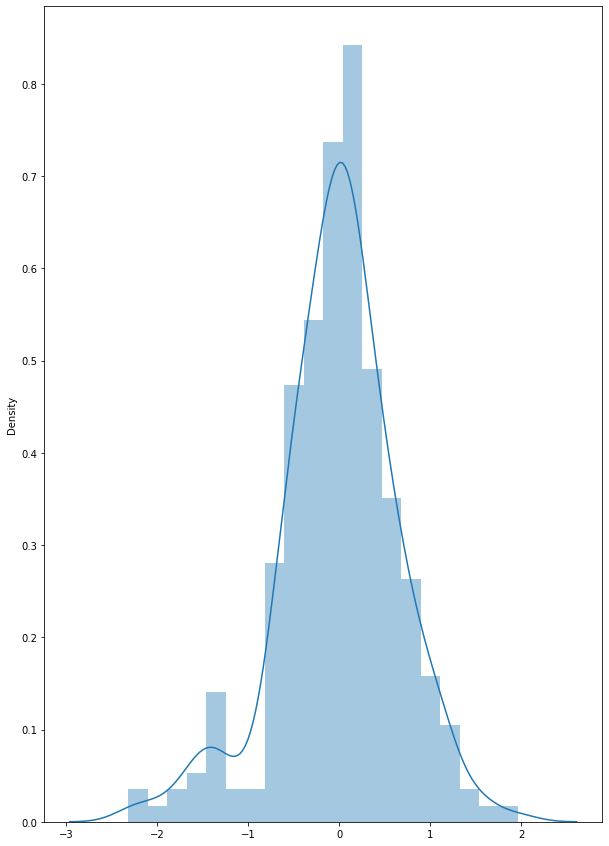

In [48]:
#plotting residuals graph 
fig = plt.figure(figsize=(10,15))
residuals = (y_test - predicted)
sns.distplot(residuals)


- The histogram of residual does have a bell shaped curve.

In [49]:
#actual vs predicted and errors
df_pred = pd.DataFrame({'Actual':y_test,'Predicted':predicted})
print(df_pred.head())
from sklearn import metrics
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test,predicted)) 
print('Mean Squared Error: ', metrics.mean_squared_error(y_test,predicted)) 
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_absolute_error(y_test,predicted)))
print('Variance Score: ', metrics.explained_variance_score(y_test,predicted))

     Actual  Predicted
0 -0.229495  -0.583554
1  0.095298   0.786524
2 -0.307288  -0.259325
3  0.309574   0.499500
4 -0.133842  -0.145485
Mean Absolute Error:  0.4812476666205038
Mean Squared Error:  0.4282363182450682
Root Mean Squared Error:  0.6937201644903396
Variance Score:  0.38373820597580444


### Linear regression with important features

    IMPORTANCE                            VARIABLE
3     0.352933                                Sqft
5     0.240088                       School_rating
0     0.094147                          Year_Built
4     0.087786                            Lot Area
6     0.061923                           WalkScore
7     0.044588                          Bike_Score
2     0.036576                                Bath
11    0.035830       Property_Type_Category_Single
12    0.019144         Status_Category_Coming soon
1     0.015217                                Beds
9     0.011093       Property_Type_Category_Others
10    0.000338  Property_Type_Category_Residential
8     0.000337             Garage_availability_Yes
13    0.000000             Status_Category_Pending


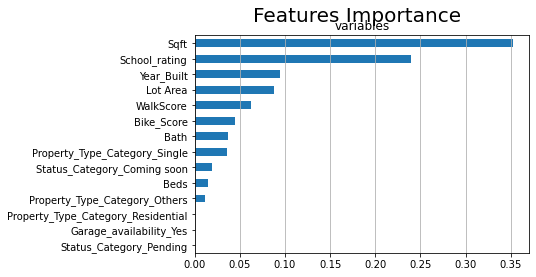

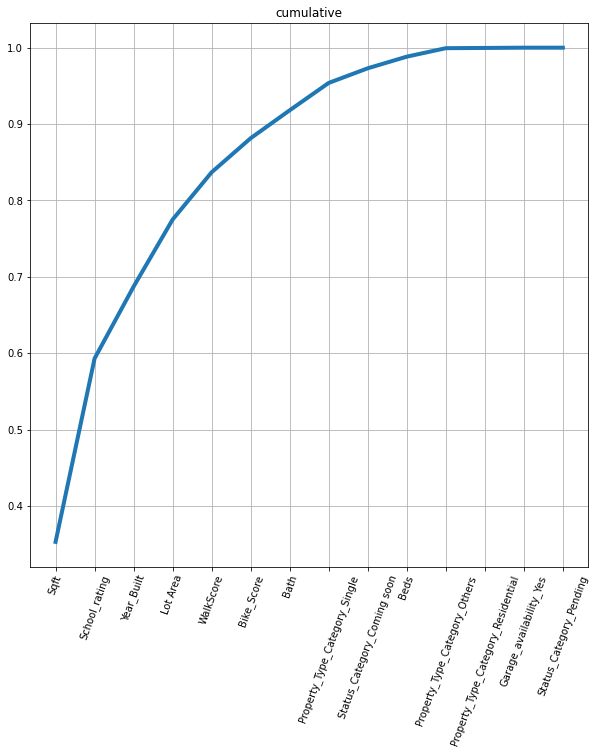

In [50]:
X = df_train.drop("Redfin_estimate", axis=1).values
y = df_train["Redfin_estimate"].values
feature_names = df_train.drop("Redfin_estimate", axis=1).columns.tolist()
## call model
model = ensemble.GradientBoostingRegressor()
## Importance
model.fit(X,y)
importances = model.feature_importances_
## Put in a pandas dtf
df_importances = pd.DataFrame({"IMPORTANCE":importances, 
            "VARIABLE":feature_names}).sort_values("IMPORTANCE", 
            ascending=False)
print(df_importances)
df_importances['cumsum'] = df_importances['IMPORTANCE'].cumsum(axis=0)
df_importances = df_importances.set_index("VARIABLE")

## Plot
#fig, ax = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False)
fig, ax = plt.subplots()
fig.suptitle("Features Importance", fontsize=20)
ax.title.set_text('variables')
df_importances[["IMPORTANCE"]].sort_values(by="IMPORTANCE").plot(
                kind="barh", legend=False, ax=ax).grid(axis="x")
ax.set(ylabel="")
plt.show()
fig, ax = plt.subplots(figsize = (10,10))
ax.title.set_text('cumulative')
df_importances[["cumsum"]].plot(kind="line", linewidth=4, legend=False, ax=ax)
ax.set(xlabel="", xticks=np.arange(len(df_importances)), xticklabels=df_importances.index)
plt.xticks(rotation=70)
plt.grid(axis='both')
plt.show()

#### Building regression model with important features

In [51]:
X_names = ['Year_Built', 'Bath', 'Sqft', 'Lot Area', 'School_rating', 'WalkScore', 'Bike_Score','Property_Type_Category_Others','Property_Type_Category_Single', 'Status_Category_Coming soon']
X_train = df_train_scaled[X_names].values
y_train = df_train_scaled["Redfin_estimate"].values
X_test = df_test_scaled[X_names].values
y_test = df_test_scaled["Redfin_estimate"].values

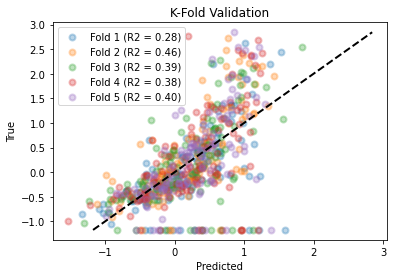

In [52]:
## call model
model = linear_model.LinearRegression()
## K fold validation
scores = []
cv = model_selection.KFold(n_splits=5, shuffle=True)
fig = plt.figure()
i = 1
for train, test in cv.split(X_train, y_train):
    prediction = model.fit(X_train[train],
                 y_train[train]).predict(X_train[test])
    true = y_train[test]
    score = metrics.r2_score(true, prediction)
    scores.append(score)
    plt.scatter(prediction, true, lw=2, alpha=0.3, 
                label='Fold %d (R2 = %0.2f)' % (i,score))
    i = i+1
plt.plot([min(y_train),max(y_train)], [min(y_train),max(y_train)], 
         linestyle='--', lw=2, color='black')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('K-Fold Validation')
plt.legend()
plt.show()

In [53]:
## train
model.fit(X_train, y_train)
## test
predicted = model.predict(X_test)

C:\Users\STSC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

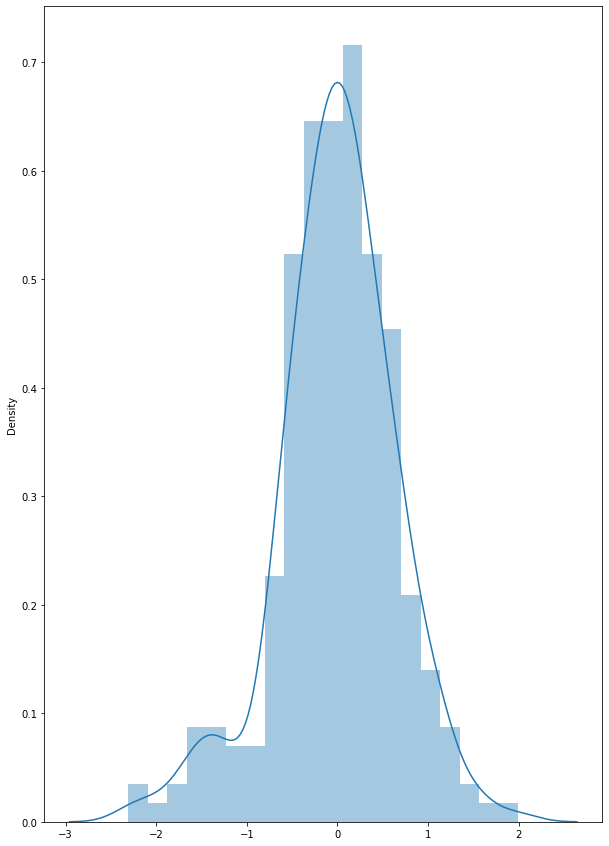

In [54]:
#plotting residuals graph 
fig = plt.figure(figsize=(10,15))
residuals = (y_test - predicted)
sns.distplot(residuals)

In [55]:
#actual vs predicted and errors
df_pred = pd.DataFrame({'Actual':y_test,'Predicted':predicted})
print(df_pred.head())
from sklearn import metrics
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test,predicted)) 
print('Mean Squared Error: ', metrics.mean_squared_error(y_test,predicted)) 
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_absolute_error(y_test,predicted)))
print('Variance Score: ', metrics.explained_variance_score(y_test,predicted))

     Actual  Predicted
0 -0.229495  -0.604563
1  0.095298   0.881000
2 -0.307288  -0.283487
3  0.309574   0.500296
4 -0.133842  -0.103272
Mean Absolute Error:  0.48897296708368104
Mean Squared Error:  0.4299070133597834
Root Mean Squared Error:  0.6992660202552967
Variance Score:  0.3813417311126107


### Randome Forest regressor

In [56]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error
 # create regressor object
regressor1 = RandomForestRegressor(n_estimators = 200, n_jobs=-1,random_state = 0)
  
# fit the regressor with x and y data
regressor1.fit(X_train, y_train)  

## test
predicted1 = regressor1.predict(X_test)

In [57]:
#actual vs predicted and errors
df_pred = pd.DataFrame({'Actual':y_test,'Predicted':predicted1})
print(df_pred.head())
from sklearn import metrics
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test,predicted1)) 
print('Mean Squared Error: ', metrics.mean_squared_error(y_test,predicted1)) 
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_absolute_error(y_test,predicted1)))
print('Variance Score: ', metrics.explained_variance_score(y_test,predicted1))

     Actual  Predicted
0 -0.229495  -0.481668
1  0.095298   1.007904
2 -0.307288  -0.183620
3  0.309574   0.240648
4 -0.133842  -0.289511
Mean Absolute Error:  0.4280612091998374
Mean Squared Error:  0.4003148486405658
Root Mean Squared Error:  0.6542638681754002
Variance Score:  0.4268223232663174


In [58]:

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))




# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE


    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
          
        },
        index=[0],
    )

    return df_perf

In [59]:
model_performance_regression(model, X_train, y_train)

,RMSE,MAE,R-squared,Adj. R-squared
0,0.672186,0.476345,0.414119,0.404498


In [60]:
model_performance_regression(model, X_test, y_test)

,RMSE,MAE,R-squared,Adj. R-squared
0,0.655673,0.488973,0.381119,0.356849


- From both the methods it is observed that random forest regressor is performing better than linear regression model. 
- RMSE score of train and test data shows that model is not overfitting with the data.